In [9]:
import small_world_propensity as swp

import scipy.io as sio
import networkx as nx
import numpy as np

In [10]:

cat = sio.loadmat('data/cat.mat')['CIJctx']
cat = swp.make_symmetric(cat)
G = nx.from_numpy_array(cat)

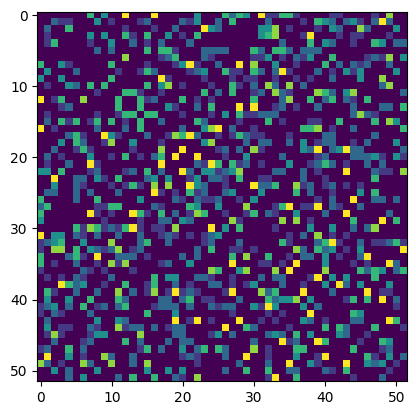

In [11]:
np.random.seed(0)


reg_mat = swp.regular_matrix_generator(cat, swp.get_avg_rad_eff(cat))
reg = nx.from_numpy_array(reg_mat)
rand_mat = swp.randomize_matrix(cat)
rand = nx.from_numpy_array(rand_mat)

import matplotlib.pyplot as plt

plt.imshow(nx.to_numpy_array(rand))

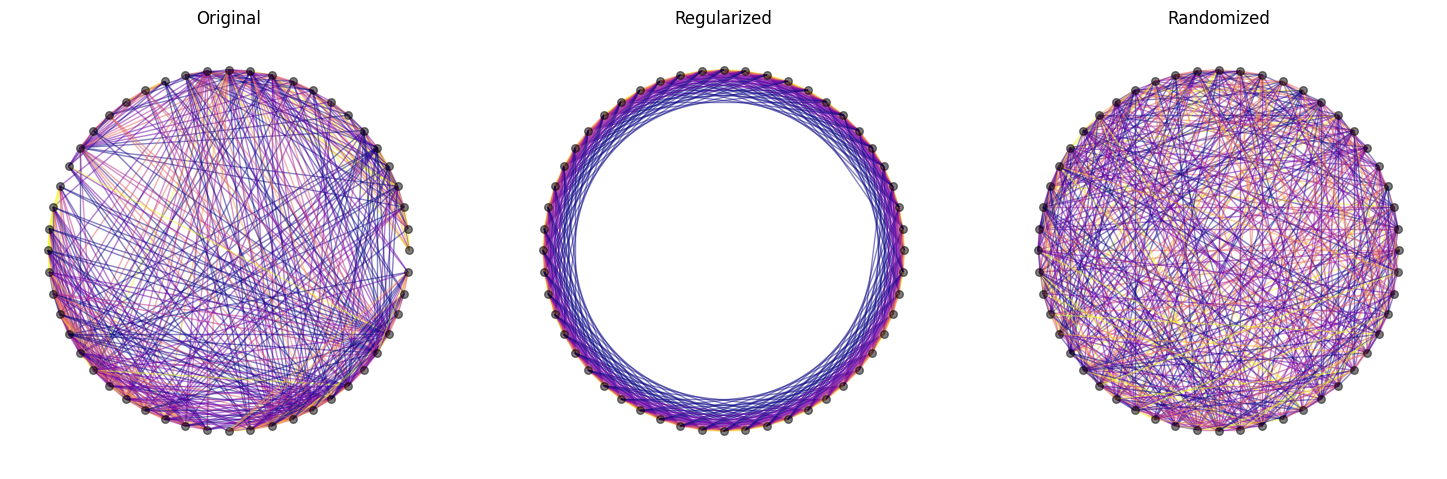

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(aspect="equal"))
fig.tight_layout()
for i, j in G.edges():
    G[i][j]["weight"] = cat[i, j]

for i, j in reg.edges():
    reg[i][j]["weight"] = reg_mat[i, j]

for i, j in rand.edges():
    rand[i][j]["weight"] = rand_mat[i, j]

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color='k', node_size=30, edgelist=edges, edge_color=weights, width=1, alpha=0.5, edge_cmap=plt.cm.plasma, ax=ax1)
ax1.set_title('Original')

edges,weights = zip(*nx.get_edge_attributes(reg,'weight').items())
pos = nx.circular_layout(reg)
nx.draw(reg, pos, node_color='k', node_size=30, edgelist=edges, edge_color=weights, width=1, alpha=0.5, edge_cmap=plt.cm.plasma, ax=ax2)
ax2.set_title('Regularized')

edges,weights = zip(*nx.get_edge_attributes(rand,'weight').items())
pos = nx.circular_layout(rand)
nx.draw(rand, pos, node_color='k', node_size=30, edgelist=edges, edge_color=weights, width=1, alpha=0.5, edge_cmap=plt.cm.plasma, ax=ax3)
ax3.set_title('Randomized')

plt.savefig('img/cat_graphs.png', dpi=300)
plt.show()


In [13]:
phi = swp.small_world_propensity(cat)
phi

,Network C,Network L,ΔC,ΔL,SWP,α,δ,Regular C,Random C,Regular L,Random L
0,0.270482,3.566516,0.17226,0.251539,0.784425,0.970327,0.235458,0.296968,0.143214,5.877602,2.789819


In [15]:
phi.values[0]

array([0.270482  , 3.56651584, 0.17226033, 0.25153869, 0.7844248 ,
       0.97032676, 0.2354584 , 0.29696763, 0.14321412, 5.87760181,
       2.789819  ])

In [17]:
np.allclose(phi.values[0], phi.values[0])

True